# SRCNN : 学習処理結果  
.npyフォーマットで保存した計算過程をグラフ化する  
学習過程のPSNR(dB)遷移グラフを表示する  

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

dBhistory_file = 'dBhistory.npy'

### BICUBIC拡大縮小劣化画像：学習過程のPSNR(dB)グラフ  
縦軸：PSNR(dB)  
横軸：epoch 50000エポックを500エポックごとにdBを表示    

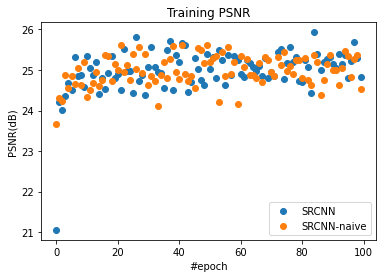

Training PSNR   SRCNN            MAX/MIN = 25.930853/21.054409
Training PSNR   SRCNN-naive      MAX/MIN = 25.624722/23.668208


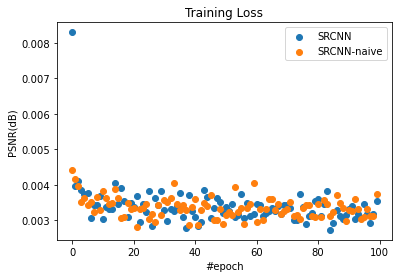

Training Loss   SRCNN            MAX/MIN = 0.008304/0.002731
Training Loss   SRCNN-naive      MAX/MIN = 0.004427/0.002807


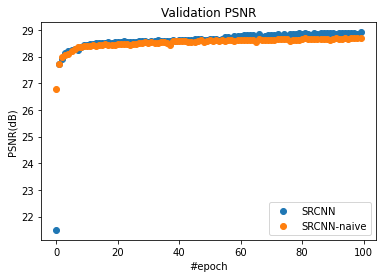

Validation PSNR SRCNN            MAX/MIN = 28.913282/21.498394
Validation PSNR SRCNN-naive      MAX/MIN = 28.709858/26.778449


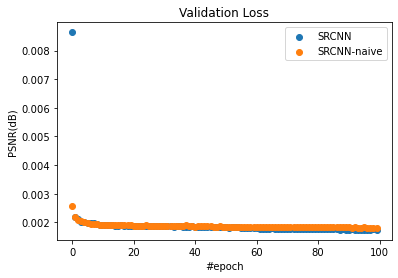

Validation Loss SRCNN            MAX/MIN = 0.008640/0.001733
Validation Loss SRCNN-naive      MAX/MIN = 0.002553/0.001805


In [2]:
dBhistory_files = [str(d) for d in Path('result').glob('*/'+dBhistory_file)]
dBhistory_files = ['result/SRCNN/dBhistory.npy','result/SRCNN-naive/dBhistory.npy']
trainLossCol, trainPSNRCol, valLossCol, valPSNRCol = [i for i in range(4)]
resTrainPSNR = {}
resTrainLoss = {}
resValPSNR   = {}
resValLoss   = {}
for dBhistory in dBhistory_files:
    dB = np.load(dBhistory,allow_pickle=True)
    job = os.path.dirname(dBhistory).split('/')[-1]
    resTrainPSNR[job] = dB[:,trainPSNRCol]
    resTrainLoss[job] = dB[:,trainLossCol]
    resValPSNR[job]   = dB[:,valPSNRCol]
    resValLoss[job]   = dB[:,valLossCol]

def Plotting(title, resultdB):
    # scatter
    for k in resultdB.keys():
        data = resultdB[k]
        plt.scatter(range(len(data)), data)
    plt.title(title)
    plt.legend(resultdB.keys())
    plt.xlabel("#epoch")
    plt.ylabel("PSNR(dB)")
    plt.show()
    for k in resultdB.keys():
        data = resultdB[k]
        print("{:16s}{:16s} MAX/MIN = {:.6f}/{:.6f}".format(title,k,max(resultdB[k]),min(resultdB[k])))
    
if len(resTrainPSNR)==0:
    print('Error : Shown Data not found!')
else:
    Plotting('Training PSNR',   resTrainPSNR)
    Plotting('Training Loss',   resTrainLoss)
    Plotting('Validation PSNR', resValPSNR)
    Plotting('Validation Loss', resValLoss)

### 考察 データ拡張有無しでの学習比較編
**凡例と実行条件**  
SRCNN-naive : 特徴抽出層カーネルを9x9の１種類持つ参照論文記載のモデル  
SRCNN：特徴抽出層カーネルを9x9の１種類持つ参照論文記載のモデル    
**PSNR比較**  
３種類のデータ拡張処理による悪化はなく、PSNRの向上が確認できた

### JPEG圧縮＋BICUBIC拡大縮小劣化画像：学習過程のPSNR(dB)グラフ  
縦軸：PSNR(dB)  
横軸：epoch 50000エポックを500エポックごとにdBを表示    

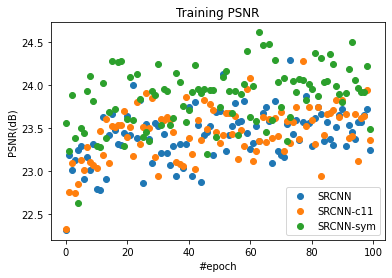

Training PSNR   SRCNN            MAX/MIN = 24.293758/22.315655
Training PSNR   SRCNN-c11        MAX/MIN = 24.288301/22.328830
Training PSNR   SRCNN-sym        MAX/MIN = 24.619296/22.630462


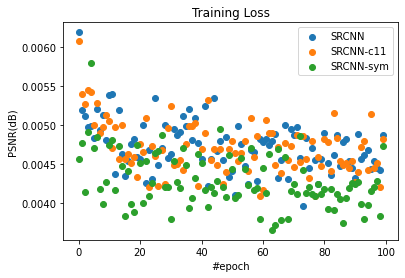

Training Loss   SRCNN            MAX/MIN = 0.006187/0.003967
Training Loss   SRCNN-c11        MAX/MIN = 0.006071/0.004087
Training Loss   SRCNN-sym        MAX/MIN = 0.005798/0.003659


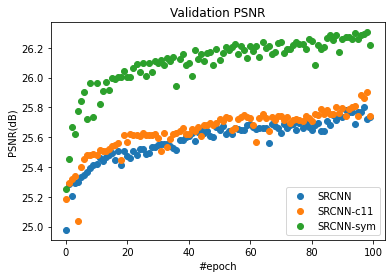

Validation PSNR SRCNN            MAX/MIN = 25.805046/24.977516
Validation PSNR SRCNN-c11        MAX/MIN = 25.903455/25.036379
Validation PSNR SRCNN-sym        MAX/MIN = 26.304249/25.254454


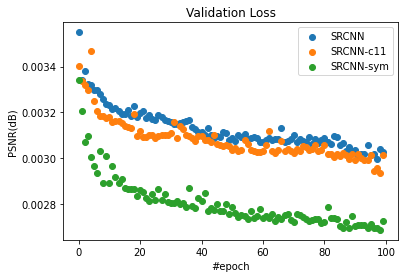

Validation Loss SRCNN            MAX/MIN = 0.003549/0.002998
Validation Loss SRCNN-c11        MAX/MIN = 0.003469/0.002936
Validation Loss SRCNN-sym        MAX/MIN = 0.003341/0.002688


In [3]:
dBhistory_files = [str(d) for d in Path('result').glob('*/'+dBhistory_file)]
dBhistory_files = ['result-comp10/SRCNN/dBhistory.npy','result-comp10/SRCNN-c11/dBhistory.npy','result-comp10/SRCNN-sym/dBhistory.npy']
trainLossCol, trainPSNRCol, valLossCol, valPSNRCol = [i for i in range(4)]
resTrainPSNR = {}
resTrainLoss = {}
resValPSNR   = {}
resValLoss   = {}
for dBhistory in dBhistory_files:
    dB = np.load(dBhistory,allow_pickle=True)
    job = os.path.dirname(dBhistory).split('/')[-1]
    resTrainPSNR[job] = dB[:,trainPSNRCol]
    resTrainLoss[job] = dB[:,trainLossCol]
    resValPSNR[job]   = dB[:,valPSNRCol]
    resValLoss[job]   = dB[:,valLossCol]

def Plotting(title, resultdB):
    # scatter
    for k in resultdB.keys():
        data = resultdB[k]
        plt.scatter(range(len(data)), data)
    plt.title(title)
    plt.legend(resultdB.keys())
    plt.xlabel("#epoch")
    plt.ylabel("PSNR(dB)")
    plt.show()
    for k in resultdB.keys():
        data = resultdB[k]
        print("{:16s}{:16s} MAX/MIN = {:.6f}/{:.6f}".format(title,k,max(resultdB[k]),min(resultdB[k])))
    
if len(resTrainPSNR)==0:
    print('Error : Shown Data not found!')
else:
    Plotting('Training PSNR',   resTrainPSNR)
    Plotting('Training Loss',   resTrainLoss)
    Plotting('Validation PSNR', resValPSNR)
    Plotting('Validation Loss', resValLoss)

### 考察 JPEG圧縮データ学習編
**凡例と実行条件**  
SRCNN：特徴抽出層カーネルを9x9の１種類持つ参照論文記載のモデル  
SRCNN-c11：特徴抽出層のカーネルサイズ9x9に11x11の特徴抽出層を追加：SRCNN11モデル  
SRCNN-sym：SRCNNに残差機構を追加し、低層の情報を上位層へ直接伝えると共に、勾配消失を回避:SYMモデル  
**PSNR比較**  
SRCNNを拡張した*5層モデルSYM*で大きくロス並びにPSNRが改善された。２層を追加し特徴抽出を強化したことに加え、下層情報を上位へ直接伝えることで、*最終層で多くの情報を解析*できることがPSNR改善に寄与したと考える。  
*11x11カーネルを追加したSRCNN11*でも改善は見られるが*ごくわずか*であった。演算量をオリジナル同等とした上で改善を期待したモデルであり、わずかではあるが11x11カーネルの効果が見られることから、演算量を保ったまま7x7カーネルの追加も可能であり、更なる改善が期待できる。  